In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def load_data():
    X = np.load("data/X_part1.npy")
    X_val = np.load("data/X_val_part1.npy")
    y_val = np.load("data/y_val_part1.npy")
    return X, X_val, y_val

def load_data_multi():
    X = np.load("data/X_part2.npy")
    X_val = np.load("data/X_val_part2.npy")
    y_val = np.load("data/y_val_part2.npy")
    return X, X_val, y_val

# Load the dataset
X_train, X_val, y_val = load_data()

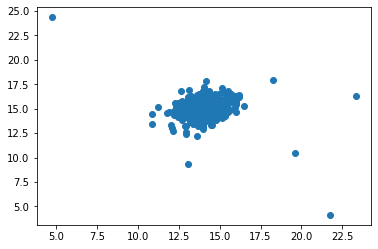

In [35]:
plt.scatter(X_train[:,0],X_train[:,1])
plt.show()

In [36]:
def estimate_gaussian(X):
    m = len(X)

    mean = 1/m*np.sum(X, axis=0)
    variance = np.var(X, axis=0)

    return mean, variance

def Univariate_gaussian(x, mu, var):
    """
    mu (float): Mean of the dataset
    var (float): Variance of the dataset
    """
    
    p = 1/np.sqrt(2*np.pi*var)*np.exp(-(x-mu)**2/2/var)

    return p

def Multivariate_gaussian(X, mu, cov):
    """
    X   ((1,n)): The value of each feature.
    mu  ((1,n) array): The mean of each variable (Each column in X).
    cov ((n,n) array): The covariance matrix.
    """
    m,n = X.shape

    prob = 1/np.power(2*np.pi, n/2)/np.sqrt(np.linalg.det(cov))*np.exp( 
        -.5*np.matmul(X-mu,np.matmul(np.linalg.pinv(cov),np.transpose(X-mu)))
     )
    
    return prob

def Calculate_Gaussian_grid(X1, X2, mu, cov):
    """
    X1, X2 (ndarray): Grid inputs for multivariate gaussian
    """
    m, n = X1.shape # Both inputs should have the same dimentions
    Z = np.zeros((m,n))

    for i in range(m):
        for j in range(n):
            t_ = np.array([X1[i,j],X2[i,j]]).reshape((1,-1))
            Z[i,j] = Multivariate_gaussian(t_, mu, cov)
    return Z


mu1, var1 = estimate_gaussian(X_train[:,0])
mu2, var2 = estimate_gaussian(X_train[:,1])

xx = np.array([15,15]).reshape((1,-1))
mu = np.array([mu1,mu2]).reshape((1,-1))
cov = np.cov(X_train, rowvar=False)

delta = 0.025
x1 = np.arange(min(X_train[:,0]), max(X_train[:,0]), delta)
x2 = np.arange(min(X_train[:,1]), max(X_train[:,1]), delta)
X1, X2 = np.meshgrid(x1, x2)

Z = Calculate_Gaussian_grid(X1,X2, mu, cov)

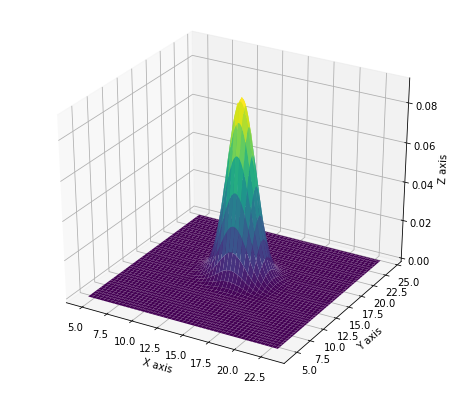

In [49]:
#Make a 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,7))
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Z,cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

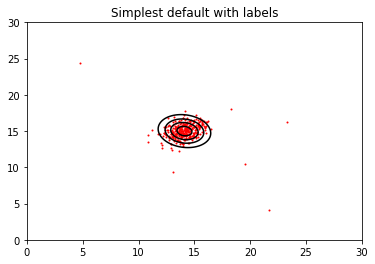

In [44]:
fig, ax = plt.subplots()
CS = ax.contour(X1, X2, Z, 5, colors = "k")
ax.set_title('Simplest default with labels')
ax.set_xlim((0,30))
ax.set_ylim((0,30))
ax.scatter(X_train[:,0],X_train[:,1], s = 1, c = "r")

In [61]:
def select_threshold(y_val, p_val):
    bestEbsilon = 0
    bestF1 = 0
    F1 = 0
    
    range_ = np.arange(np.min(p_val),np.max(p_val), (np.max(p_val)-np.min(p_val))/1000)
    for e in range_:
        pred = e < p_val
        tp = np.sum((y_val == 1) & (pred == 1)) # True positives
        fp = np.sum((y_val == 0) & (pred == 1)) # False positives
        fn = np.sum((y_val == 1) & (pred == 0)) # False negatives

        prec = tp / (tp + fp) # Precision
        rec  = tp / (tp + fn) # Recall

        # Calculating the F1 score
        F1 = 2 * prec * rec / (prec + rec) 

        if bestF1 < F1:
            bestF1 = F1
            bestEbsilon = e
    
    return bestEbsilon, bestF1

In [62]:
p_val = Multivariate_gaussian(X_val, mu, cov)
epsilon, F1 = select_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)

Best epsilon found using cross-validation: 9.237683e-41
Best F1 on Cross Validation Set: 0.056942
